<a href="https://colab.research.google.com/github/yeagerca/Cameron-Yeager-Machine-Learning-Projects/blob/main/yeagerProject1Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Set A (First column)

In [1]:
#imports
import os
import requests
import zipfile
import pandas as pd
import numpy as np
#for plotting
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
#for split
from operator import itemgetter
from sklearn.model_selection import train_test_split
#for training and evaluation
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import SGDRegressor
from sklearn import metrics

GoogleDriveFile = 'https://drive.google.com/file/d/1sVQ6oKQRlCLQ_42cBcXOp39nwvruSr6s/view?usp=sharing'
url = 'https://drive.google.com/uc?id=' + GoogleDriveFile.split('/')[-2] #Get the url
df = pd.read_csv(url)

In [2]:
#Funciton to strip the dollar signs from some columns
def removeDollarsign(arr):
  i = 0
  for x in arr:
    v = float(np.char.strip(x, '$'))
    arr[i] = v
    i = i + 1
  return arr

In [3]:
#Put the columns into numpy arrays as numerics (without dollar signs).
A = df.Call_Wt.to_numpy()
B = df.Delivered_Wt.to_numpy()
C = df.Dry_Weight.to_numpy()
D = df.Num_Animals.to_numpy()
E = removeDollarsign(df.Price.to_numpy())
F = removeDollarsign(df.Price_Animal.to_numpy())
G = df.DMI.to_numpy()

In [4]:
#Scale DMI
G = (G - np.mean(G)) / np.std(G)

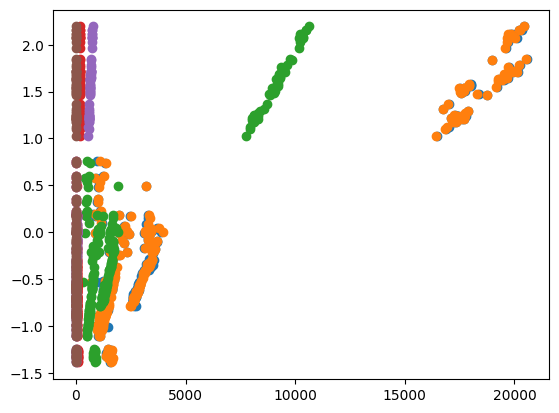

In [5]:
#Visualize
plt.scatter(A, G)
plt.scatter(B, G)
plt.scatter(C, G)
plt.scatter(D, G)
plt.scatter(E, G)
plt.scatter(F, G)

In [6]:
#Splitting to train and test set
A_train, A_test, G_train, G_test = train_test_split(A, G, test_size=0.2, random_state=0)
#B_train, B_test, G_train, G_test = train_test_split(B, G, test_size=0.2, random_state=0)
#C_train, C_test, G_train, G_test = train_test_split(C, G, test_size=0.2, random_state=0)
#D_train, D_test, G_train, G_test = train_test_split(D, G, test_size=0.2, random_state=0)
#E_train, E_test, G_train, G_test = train_test_split(E, G, test_size=0.2, random_state=0)
#F_train, F_test, G_train, G_test = train_test_split(F, G, test_size=0.2, random_state=0)

In [7]:
#Function to sort a test array set
def sortABC_test(X_test, Y_test):
  enumerate_x = enumerate(X_test)
  sorted_pairs = sorted(enumerate_x, key=itemgetter(1))
  sorted_indices = [index for index, element in sorted_pairs]
  X_test = sorted(X_test)
  Y_test = itemgetter(*sorted_indices)(Y_test)
  X_test = np.array(X_test)
  Y_test = np.array(Y_test)
  return X_test, Y_test

In [8]:
#Sort ABC_test
A_test, G_test = sortABC_test(A_test, G_test)
#print(A_test, '\n\n', G_test)

In [9]:
#Function to visualize plot
def visualizeMyPlot(X_train, Y_train, X_test, Y_test):
  figure(figsize=(18, 6), dpi=80)
  plt.subplot(1, 2, 1) # row 1, col 2 index 1
  plt.scatter(X_train, Y_train)
  plt.title("Training Data")
  plt.xlabel('X_train')
  plt.ylabel('Y_train')
  plt.subplot(1, 2, 2) # index 2
  plt.scatter(X_test, Y_test)
  plt.title("Test Data")
  plt.xlabel('X_test')
  plt.ylabel('Y_test')
  plt.tight_layout()
  plt.show()

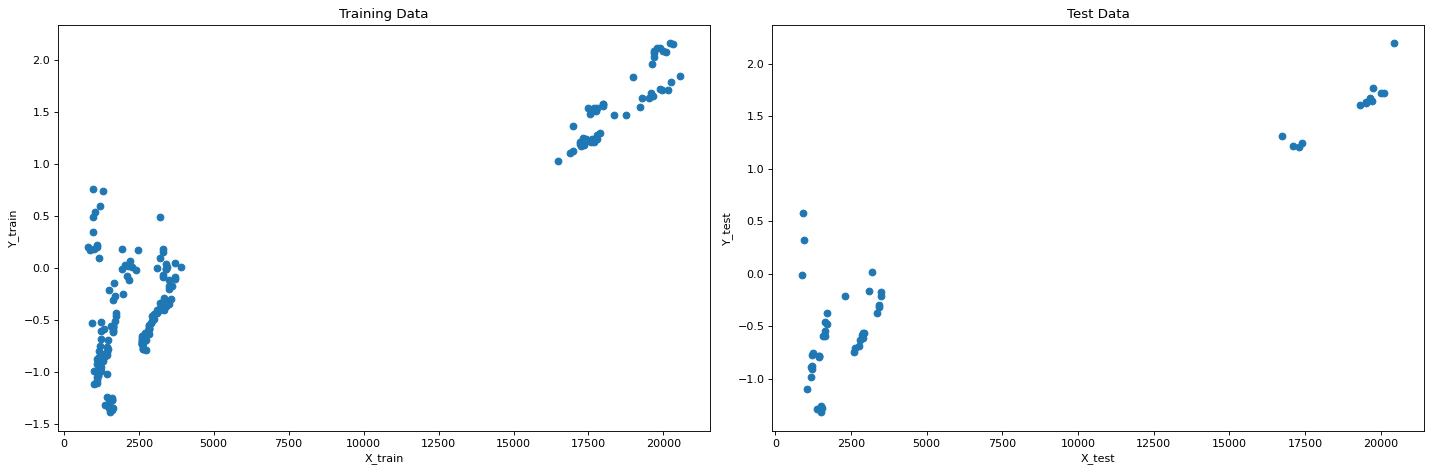

In [10]:
#Visualizing more
visualizeMyPlot(A_train, G_train, A_test, G_test)

In [11]:
#Function to Train on X data
def trainMyPlot(X_train, X_test, degree):
  X_train = X_train.reshape(-1,1)
  X_test = X_test.reshape(-1,1)
  X_train.shape, X_test.shape
  polyreg_fit = make_pipeline(PolynomialFeatures(degree), SGDRegressor())
  return polyreg_fit, X_train, X_test

In [12]:
#Train A, G
degree=1
A_polyreg_fit, A_train, A_test = trainMyPlot(A_train, A_test, degree)
A_polyreg_fit.fit(A_train, G_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=1)),
                ('sgdregressor', SGDRegressor())])

In [13]:
#Function for Prediction
def setUpPrediction(polyreg_fit, X_test, Y_test):
  X_test_sorted = sorted(X_test)
  Y_pred = polyreg_fit.predict(X_test_sorted)
  return X_test_sorted, Y_pred

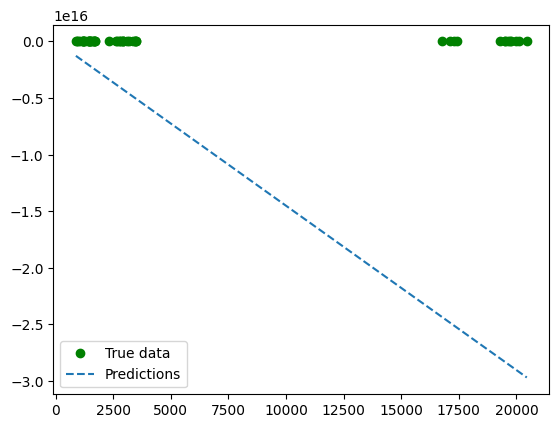

In [14]:
#Predict
A_test_sorted, G_pred = setUpPrediction(A_polyreg_fit, A_test, G_test)
#Plot the prediction
plt.clf()
plt.plot(A_test, G_test, 'go', label='True data')
plt.plot(A_test_sorted, G_pred, '--', label='Predictions')
plt.legend(loc='best')
plt.show()

In [15]:
#Function to estimate error
def estimateError(Y_test, Y_pred):
  print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
  print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
  print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

In [16]:
#Estimate error of A
estimateError(G_test, G_pred)

Mean Absolute Error: 9103650002472440.0
Mean Squared Error: 1.9817773906134954e+32
Root Mean Squared Error: 1.4077561545287222e+16


# Editted for reexecution of different columns

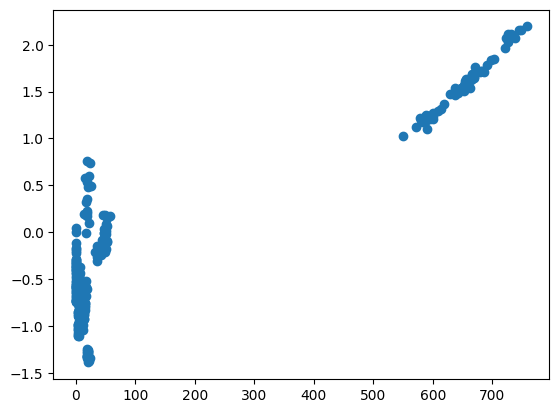

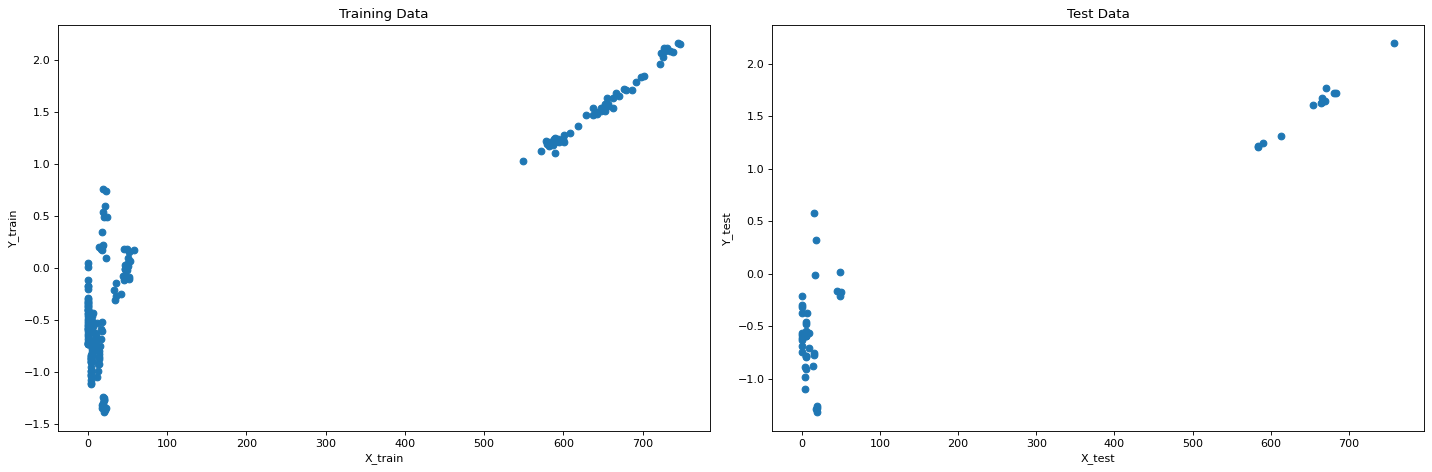

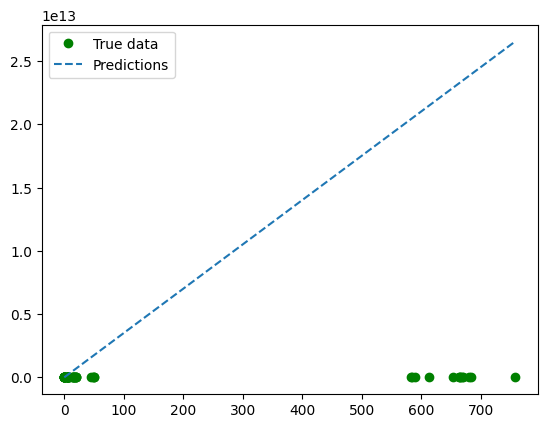

Mean Absolute Error: 6020749549578.551
Mean Squared Error: 1.3139578395758281e+26
Root Mean Squared Error: 11462800005128.887


In [17]:
# This code block is just a repeat of all of the above codeblocks to
# be reexecuted using a different column.

#imports
import os
import requests
import zipfile
import pandas as pd
import numpy as np
#for plotting
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
#for split
from operator import itemgetter
from sklearn.model_selection import train_test_split
#for training and evaluation
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import SGDRegressor
from sklearn import metrics

GoogleDriveFile = 'https://drive.google.com/file/d/1sVQ6oKQRlCLQ_42cBcXOp39nwvruSr6s/view?usp=sharing'
url = 'https://drive.google.com/uc?id=' + GoogleDriveFile.split('/')[-2] #Get the url
df = pd.read_csv(url)

#Funciton to strip the dollar signs from some columns
def removeDollarsign(arr):
  i = 0
  for x in arr:
    v = float(np.char.strip(x, '$'))
    arr[i] = v
    i = i + 1
  return arr

#Put the columns into numpy arrays as numerics (without dollar signs).
A = df.Call_Wt.to_numpy()
B = df.Delivered_Wt.to_numpy()
C = df.Dry_Weight.to_numpy()
D = df.Num_Animals.to_numpy()
E = removeDollarsign(df.Price.to_numpy())
F = removeDollarsign(df.Price_Animal.to_numpy())
G = df.DMI.to_numpy()

#Scale DMI
G = (G - np.mean(G)) / np.std(G)

#Visualize
plt.scatter(E, G)

#Splitting to train and test set
E_train, E_test, G_train, G_test = train_test_split(E, G, test_size=0.2, random_state=0)

#Function to sort a test array set
def sortABC_test(X_test, Y_test):
  enumerate_x = enumerate(X_test)
  sorted_pairs = sorted(enumerate_x, key=itemgetter(1))
  sorted_indices = [index for index, element in sorted_pairs]
  X_test = sorted(X_test)
  Y_test = itemgetter(*sorted_indices)(Y_test)
  X_test = np.array(X_test)
  Y_test = np.array(Y_test)
  return X_test, Y_test

#Sort ABC_test
E_test, G_test = sortABC_test(E_test, G_test)

#Function to visualize plot
def visualizeMyPlot(X_train, Y_train, X_test, Y_test):
  figure(figsize=(18, 6), dpi=80)
  plt.subplot(1, 2, 1) # row 1, col 2 index 1
  plt.scatter(X_train, Y_train)
  plt.title("Training Data")
  plt.xlabel('X_train')
  plt.ylabel('Y_train')
  plt.subplot(1, 2, 2) # index 2
  plt.scatter(X_test, Y_test)
  plt.title("Test Data")
  plt.xlabel('X_test')
  plt.ylabel('Y_test')
  plt.tight_layout()
  plt.show()

#Visualizing more
visualizeMyPlot(E_train, G_train, E_test, G_test)

#Function to Train on X data
def trainMyPlot(X_train, X_test, degree):
  X_train = X_train.reshape(-1,1)
  X_test = X_test.reshape(-1,1)
  X_train.shape, X_test.shape
  polyreg_fit = make_pipeline(PolynomialFeatures(degree), SGDRegressor())
  return polyreg_fit, X_train, X_test

#Train A, G
degree=1
E_polyreg_fit, E_train, E_test = trainMyPlot(E_train, E_test, degree)
E_polyreg_fit.fit(E_train, G_train)

#Function for Prediction
def setUpPrediction(polyreg_fit, X_test, Y_test):
  X_test_sorted = sorted(X_test)
  Y_pred = polyreg_fit.predict(X_test_sorted)
  return X_test_sorted, Y_pred

#Predict
E_test_sorted, G_pred = setUpPrediction(E_polyreg_fit, E_test, G_test)
#Plot the prediction
plt.clf()
plt.plot(E_test, G_test, 'go', label='True data')
plt.plot(E_test_sorted, G_pred, '--', label='Predictions')
plt.legend(loc='best')
plt.show()

#Function to estimate error
def estimateError(Y_test, Y_pred):
  print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
  print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
  print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

#Estimate error of A
estimateError(G_test, G_pred)

# Results of Single Input Linear Regression

Set A vs G (Call_Wt vs DMI):
*   Mean Absolute Error: 2.0033493653694e+16
*   Mean Squared Error: 9.596620894200094e+32
*   Root Mean Squared Error: 3.097841328118678e+16

Set B vs G (Delivered_Wt vs DMI):
*   Mean Absolute Error: 4179914473564771.0
*   Mean Squared Error: 4.15590193636892e+31
*   Root Mean Squared Error: 6446628526888237.0

Set C vs G (Dry_Weight vs DMI):
*   Mean Absolute Error: 1.984486825238144e+16
*   Mean Squared Error: 9.422938156826563e+32
*   Root Mean Squared Error: 3.069680464938747e+16

Set D vs G (Num_Animals vs DMI):
*   Mean Absolute Error: 80520327925.89607
*   Mean Squared Error: 9.790559564486484e+21
*   Root Mean Squared Error: 98947256477.81491

Set E vs G (Price vs DMI):
*   Mean Absolute Error: 90925495991551.69
*   Mean Squared Error: 3.0026747721416152e+28
*   Root Mean Squared Error: 173282277574529.1

Set F vs G (Price_Animal vs DMI):
*   Mean Absolute Error: 0.21733916964369537
*   Mean Squared Error: 0.083478119469686
*   Root Mean Squared Error: 0.28892580270665685

**Price_Animal is clearly the best predictor,** all others have very high error.